In [32]:
''' 
Attribute Information:

Id number: 1 to 214 (removed from CSV file)
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps
'''

' \nAttribute Information:\n\nId number: 1 to 214 (removed from CSV file)\nRI: refractive index\nNa: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)\nMg: Magnesium\nAl: Aluminum\nSi: Silicon\nK: Potassium\nCa: Calcium\nBa: Barium\nFe: Iron\nType of glass: (class attribute)\n-- 1 building_windows_float_processed\n-- 2 building_windows_non_float_processed\n-- 3 vehicle_windows_float_processed\n-- 4 vehicle_windows_non_float_processed (none in this database)\n-- 5 containers\n-- 6 tableware\n-- 7 headlamps\n'

In [33]:
''' 
Import module  pandas, matplotlib, seaborn, plotly
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC    
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
''' 
You can read dataset for csv file, don't forget use path csv file in your folder. 
'''

df = pd.read_csv('glass.csv')
features = df.columns[:-1].tolist()
print("name coloumns :", features)
display(df)

name coloumns : ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [35]:
''' You can see type data for your information if you needs it '''

df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [36]:
'''' Result information from dataset glass : mean, count data, min and max data, and std '''

df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [37]:
'''
Information for Type of glass :
1. Building Windows Float Processed 
'''

type_1 = df.iloc[:70, :10]
print(type_1)

         RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  Type
0   1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.0  0.00     1
1   1.51761  13.89  3.60  1.36  72.73  0.48   7.83  0.0  0.00     1
2   1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.0  0.00     1
3   1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.0  0.00     1
4   1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.0  0.00     1
..      ...    ...   ...   ...    ...   ...    ...  ...   ...   ...
65  1.52099  13.69  3.59  1.12  71.96  0.09   9.40  0.0  0.00     1
66  1.52152  13.05  3.65  0.87  72.22  0.19   9.85  0.0  0.17     1
67  1.52152  13.05  3.65  0.87  72.32  0.19   9.85  0.0  0.17     1
68  1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.0  0.16     1
69  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03     1

[70 rows x 10 columns]


In [38]:
''' Material for Type 1 : Building Windows Float Processed '''

mean_RI = df.iloc[0:70, 0].mean()
mean_Na = df.iloc[0:70, 1].mean()
mean_Mg = df.iloc[0:70, 2].mean()
mean_Al = df.iloc[0:70, 3].mean()
mean_Si = df.iloc[0:70, 4].mean()
mean_K  = df.iloc[0:70, 5].mean()
mean_Ca = df.iloc[0:70, 6].mean()
mean_Ba = df.iloc[0:70, 7].mean()
mean_Fe = df.iloc[0:70, 8].mean()

# max_RI = df.iloc[0:70, 0].max()
# max_Na = df.iloc[0:70, 1].max()
# max_Mg = df.iloc[0:70, 2].max()
# max_Al = df.iloc[0:70, 3].max()
# max_Si = df.iloc[0:70, 4].max()
# max_K  = df.iloc[0:70, 5].max()
# max_Ca = df.iloc[0:70, 6].max()
# max_Ba = df.iloc[0:70, 7].max()
# max_Fe = df.iloc[0:70, 8].max()

print("mean Ri :", mean_RI, "mean Na :", mean_Na, "mean Mg :", mean_Mg, "mean Al :", mean_Mg, "mean Si :", mean_Si)
print("mean K :", mean_K, "mean Ca :", mean_Ca, "mean Ba:", mean_Ba, "mean Fe:", mean_Fe)

# print("max Ri :",max_RI, "max Na :",max_Na, "max Mg :",max_Mg, "max Al :",max_Mg, "max Si :",max_Si)
# print("max K :", max_K, "max Ca :",max_Ca, "max Ba:", max_Ba, "max Fe:", max_Fe)

mean Ri : 1.5187182857142856 mean Na : 13.242285714285714 mean Mg : 3.552428571428572 mean Al : 3.552428571428572 mean Si : 72.61914285714286
mean K : 0.4474285714285715 mean Ca : 8.797285714285715 mean Ba: 0.012714285714285713 mean Fe: 0.05699999999999999


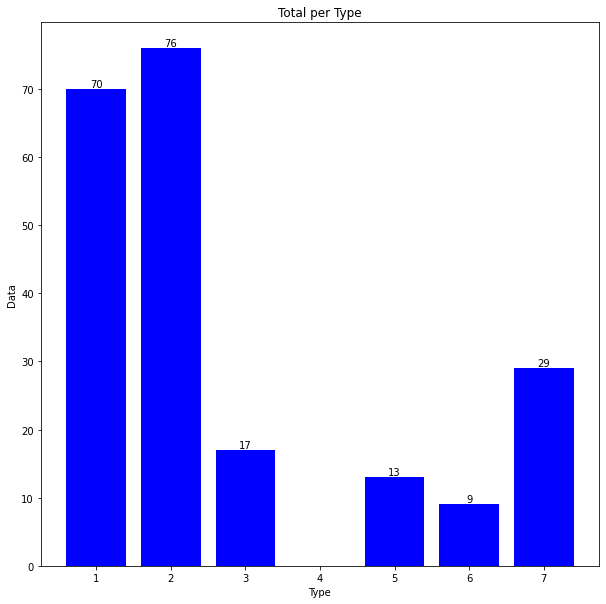

In [39]:
plt.figure(figsize=(10, 10))
type_counts = df['Type'].value_counts()
order = type_counts.index
bars = plt.bar(order, type_counts, color='blue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Type')
plt.ylabel('Data')
plt.title('Total per Type')
plt.show()

In [40]:
# from dataprep.eda import *
# from dataprep.eda import plot
# from dataprep.eda import plot_correlation
# from dataprep.eda import plot_missing
# plot(df)

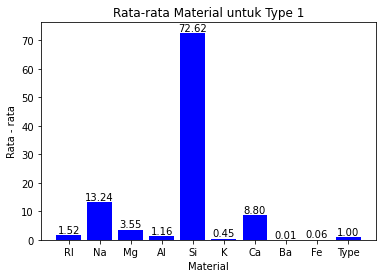

In [41]:
''' Material for Type 1 : Building Windows Float Processed '''

means = df.iloc[0:70, :].mean()
plt.bar(means.index, means.values, color='blue')
for i, value in enumerate(means.values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Material')
plt.ylabel('Rata - rata')
plt.title('Rata-rata Material untuk Type 1')
plt.show()

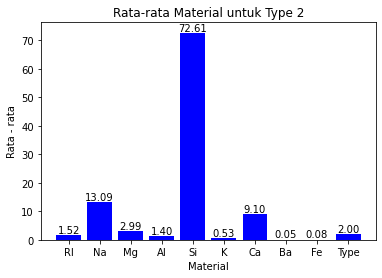

In [42]:
''' Material for Type 2 : Building Windows Non Float Processed '''

means = df.iloc[71:146, :].mean()
plt.bar(means.index, means.values, color='blue')
for i, value in enumerate(means.values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Material')
plt.ylabel('Rata - rata')
plt.title('Rata-rata Material untuk Type 2')
plt.show()

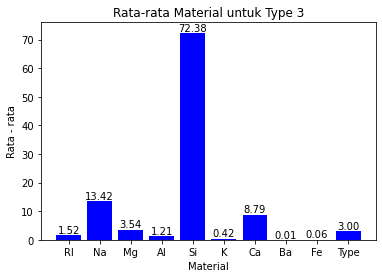

In [43]:
''' Material for Type 3 : Vehicle Windows Float Processed '''

means = df.iloc[147:163, :].mean()
plt.bar(means.index, means.values, color='blue')
for i, value in enumerate(means.values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Material')
plt.ylabel('Rata - rata')
plt.title('Rata-rata Material untuk Type 3')
plt.show()

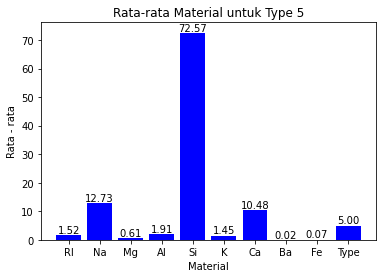

In [44]:
''' Material for Type 5 : Containers '''

means = df.iloc[164:176, :].mean()
plt.bar(means.index, means.values, color='blue')
for i, value in enumerate(means.values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Material')
plt.ylabel('Rata - rata')
plt.title('Rata-rata Material untuk Type 5')
plt.show()

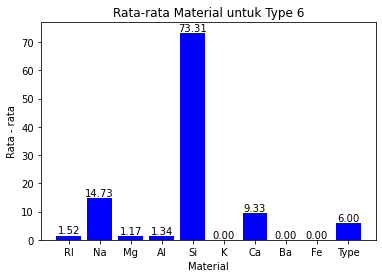

In [45]:
''' Material for Type 6 : Tableware '''

means = df.iloc[177:185, :].mean()
plt.bar(means.index, means.values, color='blue')
for i, value in enumerate(means.values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Material')
plt.ylabel('Rata - rata')
plt.title('Rata-rata Material untuk Type 6')
plt.show()

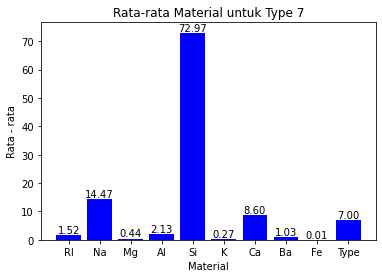

In [46]:
''' Material for Type 7 : Headlamps '''

means = df.iloc[186:214, :].mean()
plt.bar(means.index, means.values, color='blue')
for i, value in enumerate(means.values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
plt.xlabel('Material')
plt.ylabel('Rata - rata')
plt.title('Rata-rata Material untuk Type 7')
plt.show()

In [47]:
'''' Quartil for Boxplot '''

# Q1, Q2, Q3 for material RI 

Q1 = df.iloc[0:70, 8].quantile(0.25)
Q2 = df.iloc[0:70, 8].quantile(0.50)
Q3 = df.iloc[0:70, 8].quantile(0.75)
print("Boxplot for Type 1 ====", "Q1:", Q1, "Q2:", Q2, "Q3:", Q3)

Q1 = df.iloc[71:146, 8].quantile(0.25)
Q2 = df.iloc[71:146, 8].quantile(0.50)
Q3 = df.iloc[71:146, 8].quantile(0.75)
print("Boxplot for Type 2 ====", "Q1:", Q1, "Q2:", Q2, "Q3:", Q3)

Q1 = df.iloc[147:163, 8].quantile(0.25)
Q2 = df.iloc[147:163, 8].quantile(0.50)
Q3 = df.iloc[147:163, 8].quantile(0.75)
print("Boxplot for Type 3 ====", "Q1:", Q1, "Q2:", Q2, "Q3:", Q3)

Q1 = df.iloc[164:176, 8].quantile(0.25)
Q2 = df.iloc[164:176, 8].quantile(0.50)
Q3 = df.iloc[164:176, 8].quantile(0.75)
print("Boxplot for Type 5 ====", "Q1:", Q1, "Q2:", Q2, "Q3:", Q3)

Q1 = df.iloc[177:185, 8].quantile(0.25)
Q2 = df.iloc[177:185, 8].quantile(0.50)
Q3 = df.iloc[177:185, 8].quantile(0.75)
print("Boxplot for Type 6 ====", "Q1:", Q1, "Q2:", Q2, "Q3:", Q3)

Q1 = df.iloc[186:214, 8].quantile(0.25)
Q2 = df.iloc[186:214, 8].quantile(0.50)
Q3 = df.iloc[186:214, 8].quantile(0.75)
print("Boxplot for Type 7 ====", "Q1:", Q1, "Q2:", Q2, "Q3:", Q3)

Boxplot for Type 1 ==== Q1: 0.0 Q2: 0.0 Q3: 0.11
Boxplot for Type 2 ==== Q1: 0.0 Q2: 0.0 Q3: 0.16
Boxplot for Type 3 ==== Q1: 0.0 Q2: 0.0 Q3: 0.0925
Boxplot for Type 5 ==== Q1: 0.0 Q2: 0.0 Q3: 0.0
Boxplot for Type 6 ==== Q1: 0.0 Q2: 0.0 Q3: 0.0
Boxplot for Type 7 ==== Q1: 0.0 Q2: 0.0 Q3: 0.0


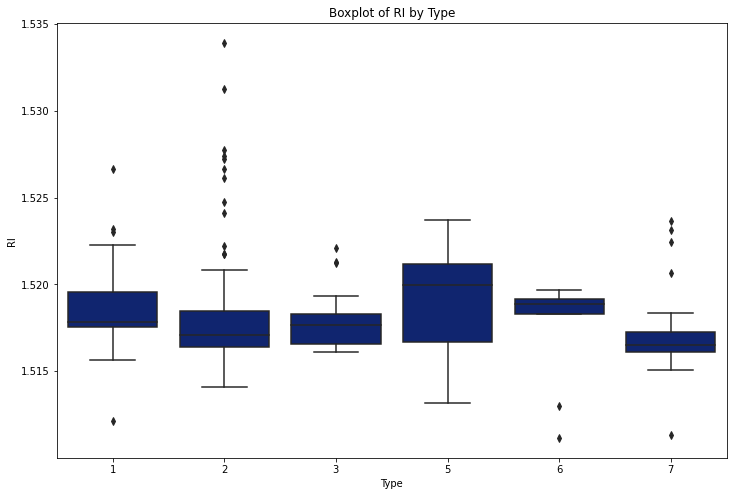

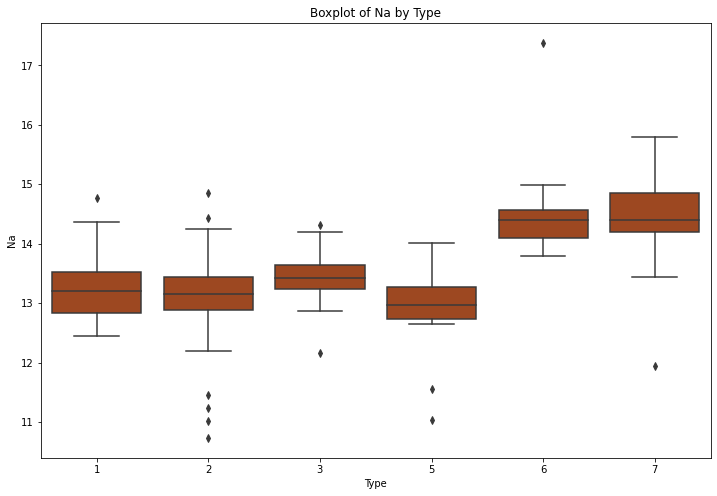

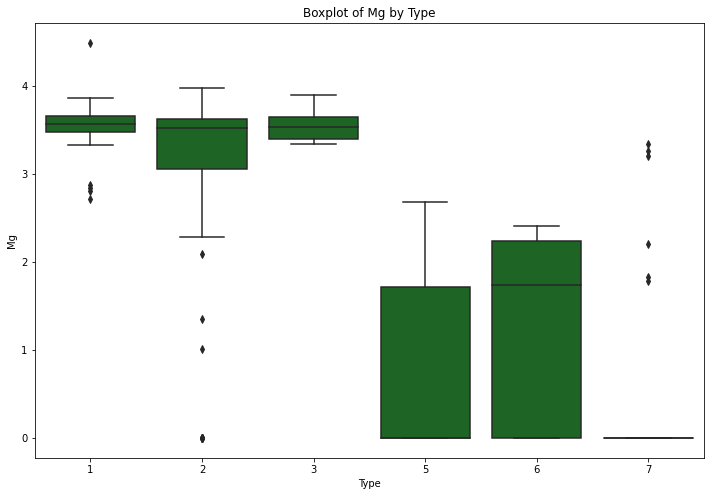

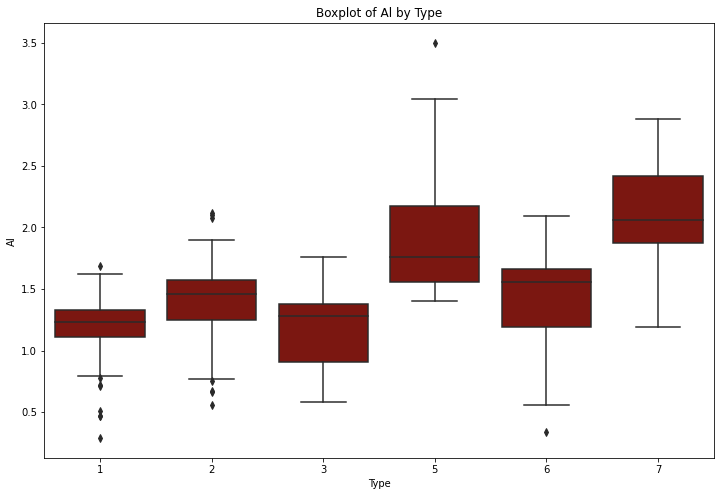

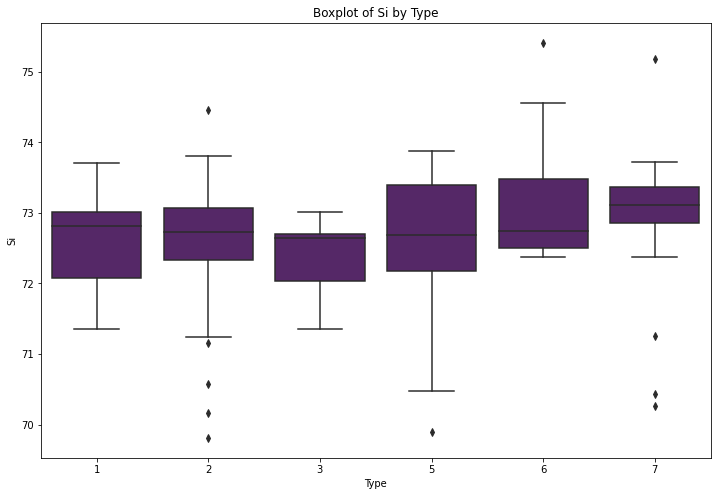

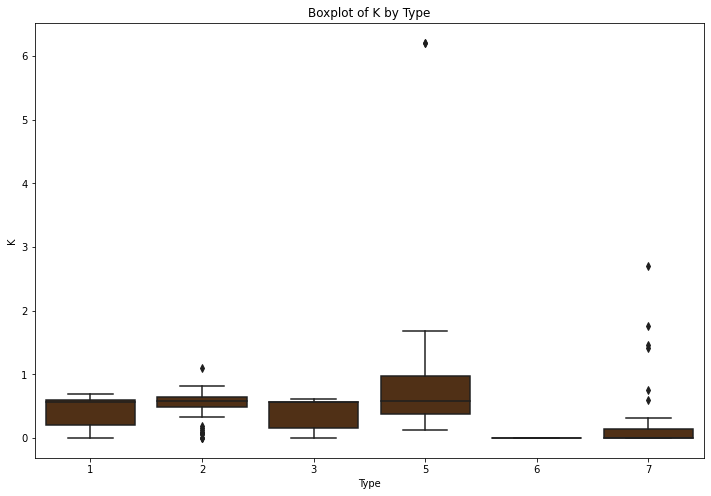

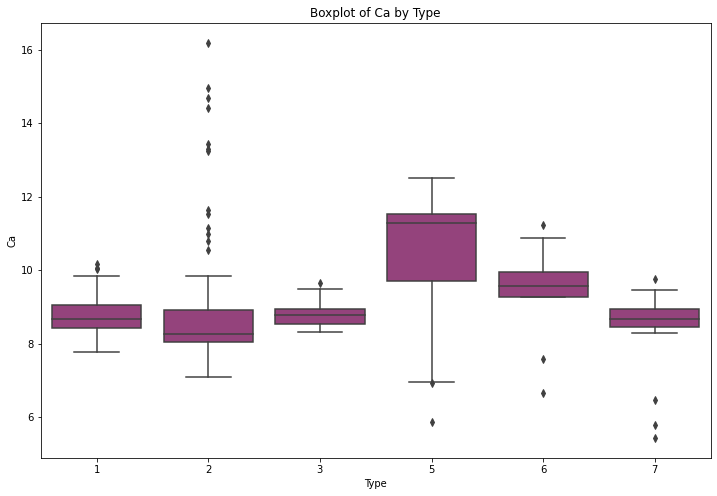

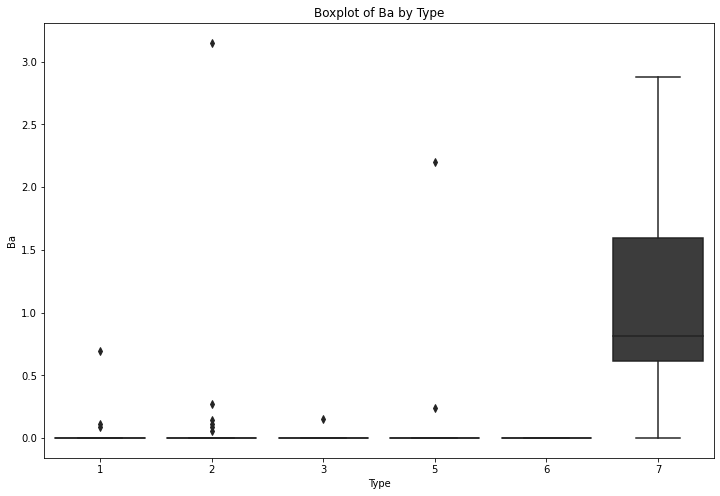

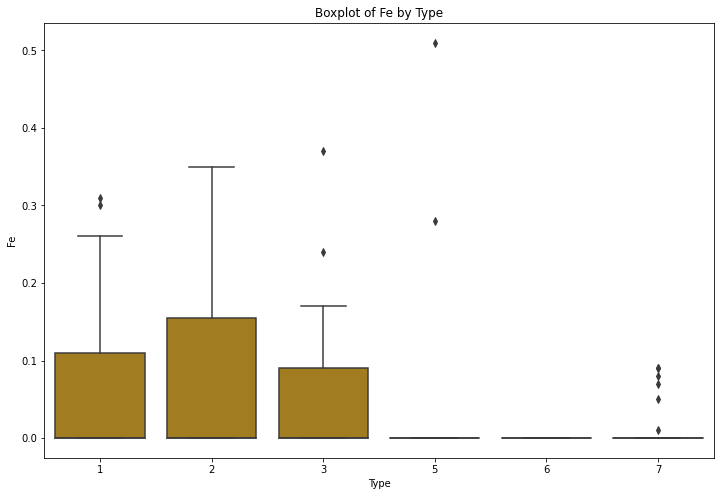

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [48]:
''' Boxplot of glass by Type '''

features_names = df.columns
colors = sns.color_palette("dark", len(features_names)-1)
for i in range(len(features_names)-1):
    plt.figure(figsize=(12, 8)) 
    ax = sns.boxplot(x='Type', y=features_names[i], data=df, palette=[colors[i]])
    plt.title('Boxplot of {} by Type'.format(features_names[i]))
    plt.xlabel('Type')
    plt.ylabel(features_names[i])
    plt.show() 

print(features_names)

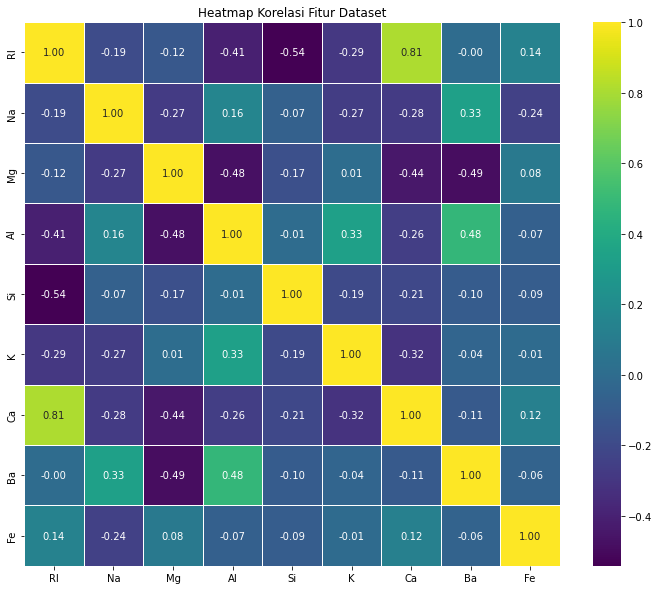

In [49]:
''' Heatmap for correlations glasssy '''

features = df.iloc[:, :-1]
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(features.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Fitur Dataset')
plt.show()

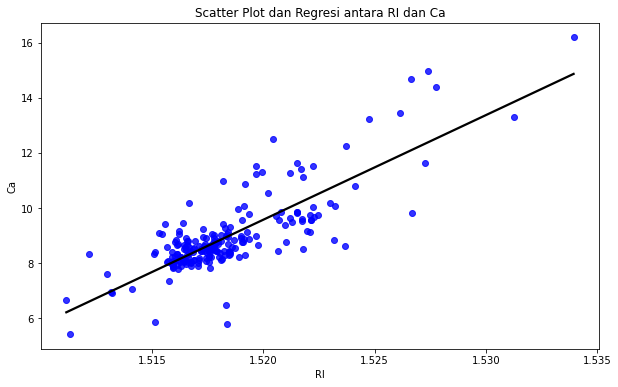

In [50]:
''' Scatter Plot Regration RI and Ca '''

RI = df['RI']
Ca = df['Ca']

plt.figure(figsize=(10, 6))
sns.regplot( x=RI.values, y=Ca.values, ci=None, line_kws={"color": "black"}, scatter_kws={"color": "blue"})
plt.title('Scatter Plot dan Regresi antara RI dan Ca')
plt.xlabel('RI')
plt.ylabel('Ca')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi Model: 0.72
Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.64      0.50      0.56        14
           3       0.60      1.00      0.75         3
           5       0.50      0.25      0.33         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.72        43
   macro avg       0.72      0.72      0.70        43
weighted avg       0.71      0.72      0.70        43



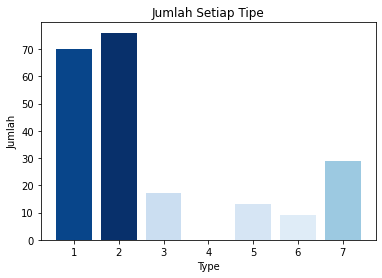

Type
2    76
1    70
7    29
3    17
5    13
Name: count, dtype: int64

In [52]:
# Menggunakan value_counts untuk menghitung jumlah setiap tipe
jumlah_per_type = df['Type'].value_counts()

# Membuat plot bar menggunakan Matplotlib dengan palet warna "Blues"
plt.bar(jumlah_per_type.index, jumlah_per_type.values, color=plt.cm.Blues(jumlah_per_type.values / max(jumlah_per_type.values)))

# Menambahkan label dan judul
plt.xlabel('Type')
plt.ylabel('Jumlah')
plt.title('Jumlah Setiap Tipe')

# Menampilkan plot
plt.show()
jumlah_per_type.head()

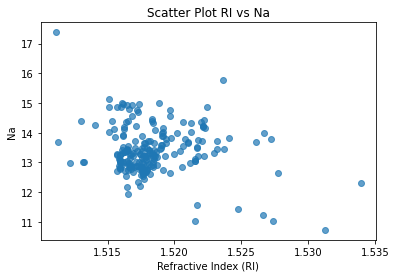

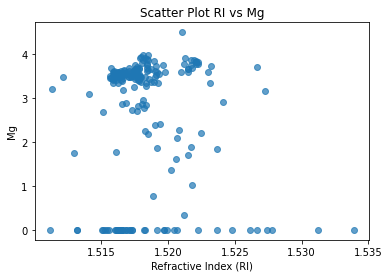

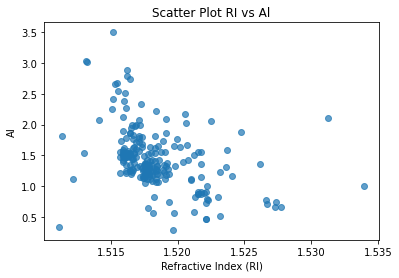

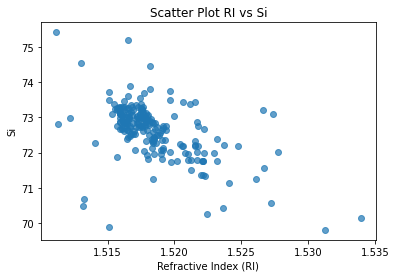

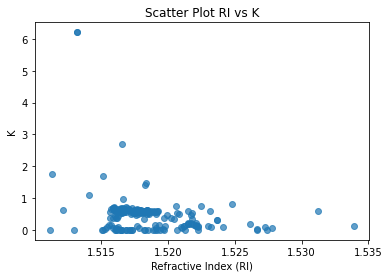

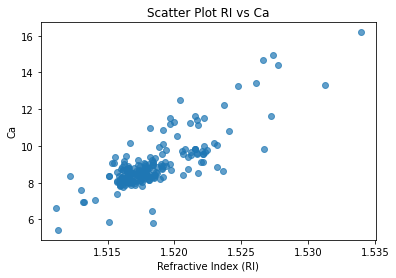

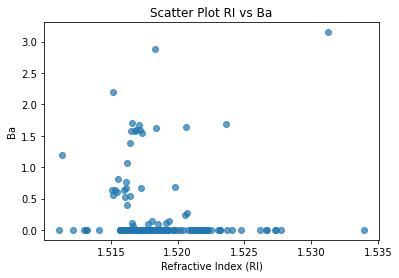

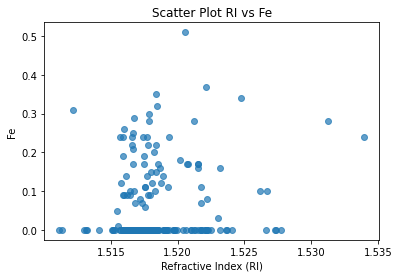

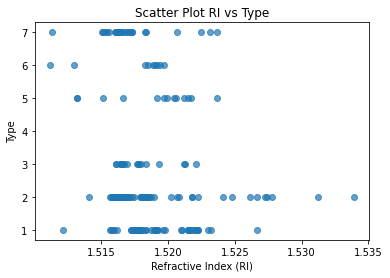

In [53]:
if 'RI' in df.columns:
    # Buat scatter plot antara kolom 'RI' dengan semua kolom lainnya
    for column in df.columns:
        if column != 'RI':  # Hindari membuat scatter plot 'RI' terhadap dirinya sendiri
            plt.figure(figsize=(6, 4))
            plt.scatter(df['RI'], df[column], alpha=0.7)
            plt.title(f"Scatter Plot RI vs {column}")
            plt.xlabel("Refractive Index (RI)")
            plt.ylabel(column)
            plt.show()
else:
    print("Kolom 'RI' tidak ada dalam DataFrame")

In [54]:
x = df.drop('Type', axis=1)
y = df['Type']

# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=27)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah nilai-nilai kelas menjadi nilai-nilai terenkripsi
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Mengekstrak kembali nilai-nilai asli dari nilai-nilai terenkripsi
Y_train_mapped = label_encoder.inverse_transform(Y_train_encoded)

# Menampilkan nilai-nilai kelas yang telah diubah
print(Y_train_mapped)

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah nilai-nilai kelas menjadi nilai-nilai terenkripsi
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Menampilkan nilai-nilai kelas yang telah diubah
print(Y_train_encoded)

[1 5 5 2 2 1 1 3 2 1 7 1 5 2 2 1 5 1 2 7 7 2 1 3 3 2 1 2 2 2 2 2 5 1 2 7 6
 3 2 7 5 2 7 2 1 1 2 1 1 7 1 1 2 2 1 1 1 3 2 5 2 7 3 1 1 1 6 1 3 7 2 2 3 2
 2 3 7 2 7 2 1 7 2 1 1 1 1 3 2 3 1 6 1 2 2 7 2 1 1 3 1 1 1 1 2 1 2 2 1 2 2
 5 1 2 1 3 1 7 7 2 2 7 1 1 1 2 1 2 2 2 1 2 1 1 2 1 2 1 2 3 6 7 1 6 2 5 5 7
 2 1 2 2 1 1 1 1 1 2 6 1]
[0 3 3 1 1 0 0 2 1 0 5 0 3 1 1 0 3 0 1 5 5 1 0 2 2 1 0 1 1 1 1 1 3 0 1 5 4
 2 1 5 3 1 5 1 0 0 1 0 0 5 0 0 1 1 0 0 0 2 1 3 1 5 2 0 0 0 4 0 2 5 1 1 2 1
 1 2 5 1 5 1 0 5 1 0 0 0 0 2 1 2 0 4 0 1 1 5 1 0 0 2 0 0 0 0 1 0 1 1 0 1 1
 3 0 1 0 2 0 5 5 1 1 5 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 2 4 5 0 4 1 3 3 5
 1 0 1 1 0 0 0 0 0 1 4 0]


In [55]:
def models(X_train, Y_train):
    # Inisialisasi LabelEncoder
    label_encoder = LabelEncoder()

    # Mengubah nilai-nilai kelas menjadi nilai-nilai terenkripsi
    Y_train_encoded = label_encoder.fit_transform(Y_train)

    #Using Logistic Regression Algorithm to the Training Set
    
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train_encoded)
    
    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, Y_train_encoded)
    
    #Using SVC method of svm class to use Support Vector Machine Algorithm
    
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train_encoded)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train_encoded)

    #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train_encoded)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    
    forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train_encoded)
    
    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train_encoded)
    
    #Using xgboostClassifier of tree class to use Decision Tree Algorithm
    from xgboost import XGBClassifier 
    xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                            min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
    xgboost.fit(X_train, Y_train_encoded)
    
    #Using SGDClassifierr of tree class to use Decision Tree Algorithm    
    from sklearn.linear_model import SGDClassifier
    SGD = SGDClassifier()
    SGD.fit(X_train, Y_train_encoded)
    
    #Using AdaBoostClassifier of tree class to use Decision Tree Algorithm    
    from sklearn.ensemble import AdaBoostClassifier
    Ada = AdaBoostClassifier(n_estimators=2000, random_state=0)
    Ada.fit(X_train, Y_train_encoded)
    
    #Using GradientBoostingClassifier of tree class to use Decision Tree Algorithm    
    from sklearn.ensemble import GradientBoostingClassifier
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
    clf.fit(X_train, Y_train_encoded)

    #Using Quadratic Discriminant Analysis of tree class to use Decision Tree Algorithm    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
    QDA = QuadraticDiscriminantAnalysis()
    QDA.fit(X_train, Y_train_encoded)

    # Print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train_encoded) * 100)
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train_encoded) * 100)
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train_encoded) * 100)
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train_encoded) * 100)
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train_encoded) * 100)
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train_encoded) * 100)
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train_encoded) * 100)
    print('[7]Xgboost Classifier Training Accuracy:', xgboost.score(X_train, Y_train_encoded) * 100)
    print('[8]SGD Classifier Training Accuracy:', SGD.score(X_train, Y_train_encoded) * 100)
    print('[9]AdaBoost Classifier Training Accuracy:', Ada.score(X_train, Y_train_encoded) * 100)
    print('[10]GradientBoosting Classifier Training Accuracy:', clf.score(X_train, Y_train_encoded) * 100)
    print('[11]Quadratic Discriminant Analysis Training Accuracy:', QDA.score(X_train, Y_train_encoded) * 100)

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, xgboost, SGD, Ada,

# Memanggil fungsi models dan menangkap model yang dikembalikan
trained_models = models(X_train, Y_train)


c:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0]Logistic Regression Training Accuracy: 68.75
[1]K Nearest Neighbor Training Accuracy: 73.125
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 71.875
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 77.5
[4]Gaussian Naive Bayes Training Accuracy: 60.0
[5]Decision Tree Classifier Training Accuracy: 100.0
[6]Random Forest Classifier Training Accuracy: 100.0
[7]Xgboost Classifier Training Accuracy: 95.0
[8]SGD Classifier Training Accuracy: 66.875
[9]AdaBoost Classifier Training Accuracy: 46.875
[10]GradientBoosting Classifier Training Accuracy: 100.0
[11]Quadratic Discriminant Analysis Training Accuracy: 78.75
